In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
sys.path.insert(1, '../libs')
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [2]:
#-------------------- Load data
data = pd.read_excel("../data/TephraDataBase_normalizado.xlsx")
data = data.replace('-',np.nan)
data = data.replace('not determined',np.nan)
data = data.replace('Not analyzed',np.nan)
data = data.replace('n.a.',np.nan)
data = data.replace('n.d.',np.nan)
data = data.replace('Over range',np.nan)
data = data.replace('bdl',np.nan)
data = data.replace('<1',np.nan)
data = data.replace('<4',np.nan)
data = data.replace('<6',np.nan)
data = data.replace('<5',np.nan)
data = data.replace('<10',np.nan)
data = data.replace('<0.01',np.nan)
data = data.replace('<0.1',np.nan)
data.Flag = data.Flag.astype(str)
data = data[(data.Flag.str.contains('|'.join(['Outlier','VolcanicSource_Issue'])) == False)]
data = data[data.Volcano!='Unknown']

In [ ]:
data.head()

In [3]:
all_volcanoes = sorted(list(data['Volcano'].unique()))
all_volcanoes

['Aguilera',
 'Antillanca-Casablanca',
 'Apagado',
 'Caburga-Huelemolle',
 'Calbuco',
 'Carrán-Los Venados',
 'Cay',
 'Chaitén',
 'Corcovado',
 'Cordón Cabrera',
 'Hornopirén',
 'Huanquihue Group',
 'Hudson',
 'Huequi',
 'Lanín',
 'Lautaro',
 'Llaima',
 'Macá',
 'Melimoyu',
 'Mentolat',
 'Michinmahuida',
 'Mocho-Choshuenco',
 'Monte Burney',
 'Osorno',
 'Puyehue-Cordón Caulle',
 'Quetrupillán',
 'Reclus',
 'Sollipulli',
 'Subsidiary Vcha dome',
 'Villarrica',
 'Yanteles',
 'Yate']

# TEST 1: Scatterplot of one volcano

Reference: https://stackoverflow.com/questions/66676027/plot-the-convex-hull-in-pca-and-lda-plot-python

In [ ]:
v = 'Antillanca-Casablanca'
v_samples = data[data.Volcano==v]
v_samples.head()

In [ ]:
points = []
x_dim = 'SiO2'
y_dim = 'K2O'
for i, row in v_samples.iterrows():
    if np.isnan(row[x_dim]) or np.isnan(row[y_dim]): continue
    p = [row[x_dim], row[y_dim]]
    points.append(p)
points = np.array(points)
hull = ConvexHull(points)

In [ ]:
# Options: http://www.qhull.org/html/qh-optq.htm
hull = ConvexHull(points, qhull_options='Qa')

In [ ]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Test 2: clustering first

In [4]:
# Gather points
v = 'Monte Burney'
v_samples = data[data.Volcano==v]
v_samples.head()

points = []
x_dim = 'SiO2'
y_dim = 'K2O'
for i, row in v_samples.iterrows():
    if np.isnan(row[x_dim]) or np.isnan(row[y_dim]): continue
    p = [row[x_dim], row[y_dim]]
    points.append(p)
points = np.array(points)

In [ ]:
# COMPUTE CLUSTERS KMEANS

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(points)
clusters = {}
for i in range(0, n_clusters):
    clusters[i] = []
for i, label in enumerate(kmeans.labels_):
    clusters[label].append(points[i])
for i in range(0, n_clusters):
    clusters[i] = np.array(clusters[i])

In [8]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0

In [14]:
# COMPUTE CLUSTERS DBSCAN
cluster_instance = DBSCAN(eps=0.3, min_samples=10).fit(points)
labels = cluster_instance.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
clusters_names = list(set(labels))
clusters_names = [str(x) for x in clusters_names]
clusters = {}
for i in clusters_names:
    clusters[i] = []
for i, label in enumerate(cluster_instance.labels_):
    clusters[str(label)].append(points[i])
for i in clusters_names:
    clusters[i] = np.array(clusters[i])

In [16]:
# SET COLORS
import matplotlib.colors as mcolors
colors = []
for c in mcolors.BASE_COLORS:
    colors.append(mcolors.to_rgb(c))
colors

[(0.0, 0.0, 1.0),
 (0.0, 0.5, 0.0),
 (1.0, 0.0, 0.0),
 (0.0, 0.75, 0.75),
 (0.75, 0.0, 0.75),
 (0.75, 0.75, 0.0),
 (0.0, 0.0, 0.0),
 (1.0, 1.0, 1.0)]

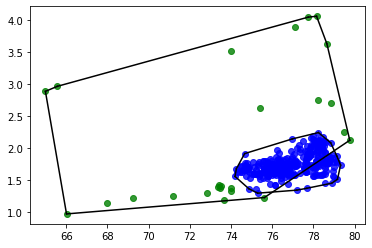

In [18]:
# PLOT

import matplotlib.pyplot as plt
color_index = 0
for c_label, c_points in clusters.items():
    c_points[:,0]
    color = colors[color_index]
    color_index += 1
    plt.scatter(c_points[:,0], c_points[:,1], color=color, alpha=.8)
    hull = ConvexHull(c_points)
    for simplex in hull.simplices:
        plt.plot(c_points[simplex, 0], c_points[simplex, 1], 'k-')

## FROM: https://towardsdatascience.com/k-means-clustering-how-it-works-finding-the-optimum-number-of-clusters-in-the-data-13d18739255c

# TEST 3: NUMBER OF CLUSTERS

TODO: This seems to be a tricky problem! 

In [ ]:
# test number of clusters

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(points) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(points)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(points, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(points, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(points[:, 0], points[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## From https://jtemporal.com/kmeans-and-elbow-method/

In [ ]:
def calculate_wcss(data):
        wcss = []
        for n in range(2, 21):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
    
        return wcss

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [ ]:
import seaborn as sns
    
from sklearn.cluster import KMeans

In [ ]:
iris = sns.load_dataset('iris')
df = iris.drop('species', axis=1)
df

In [ ]:
import seaborn as sns
    
from sklearn.cluster import KMeans
    
    
# preparing our data
iris = sns.load_dataset('iris')
df = iris.drop('species', axis=1)
    
# calculating the within clusters sum-of-squares for 19 cluster amounts
sum_of_squares = calculate_wcss(df)
    
# calculating the optimal number of clusters
n = optimal_number_of_clusters(sum_of_squares)
    
# running kmeans to our optimal number of clusters
kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(df)

In [ ]:
sum_of_squares